In [1]:
##Imports
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pageviewapi
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from progressbar import ProgressBar
from sklearn.grid_search import GridSearchCV

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1.1

#### In this part we read the data of the Influenza Wikipedia pageviews, previously download using tools.wmflabs.org/pageviews. We downloaded this data for every year (2015 - 2016, 2016 - 2017, 2017 - 2018) as we can't download the data of previous years using that tool.

- The start date for the period 2015 - 2016 is 12/10/2015 and the end date is 24/04/2016.
- The start date for the period 2016 - 2017 is 17/10/2016 and the end date is 30/04/2017.
- The start date for the period 2017 - 2018 is 16/10/2017 and the end date is 29/04/2018.

In [2]:
df2015_2016=pd.read_csv("pageviews-Influenza_2015-2016.csv")
df2016_2017=pd.read_csv("pageviews-Influenza_2016-2017.csv")
df2017_2018=pd.read_csv("pageviews-Influenza_2017-2018.csv")

#### Then we created the lists corresponding to the number of the week that we want to analyze for every period as follows:

- 2015 - 2016: Week 42 of 2015 until week 16 of 2016
- 2016 - 2017: Week 42 of 2016 until week 17 of 2017
- 2017 - 2018: Week 42 of 2017 until week 17 of 2018

In [4]:
x_1=[]
x_2=[]
x_3=[]
for i in range(42,53):
    x_1.append(str(i))
    x_2.append(str(i))
    x_3.append(str(i))
x_1.append("53")
for j in range(1,17):
    x_1.append(str(j))
    x_2.append(str(j))
    x_3.append(str(j))
x_2.append("17")
x_3.append("17")

#### As we have the daily pageviews in the dataframe, here we sum the views for every week

In [5]:
week2015_2016=[None]*len(x_1)
week2016_2017=[None]*len(x_2)
week2017_2018=[None]*len(x_3)


for i in range(len(x_1)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2015_2016['Influenza'][j]
    week2015_2016[i]=suma

    
for i in range(len(x_2)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2016_2017['Influenza'][j]
    week2016_2017[i]=suma
    
    
for i in range(len(x_3)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2017_2018['Influenza'][j]
    week2017_2018[i]=suma

#### Then we plot the Influenza Wikipedia Pageviews for each period

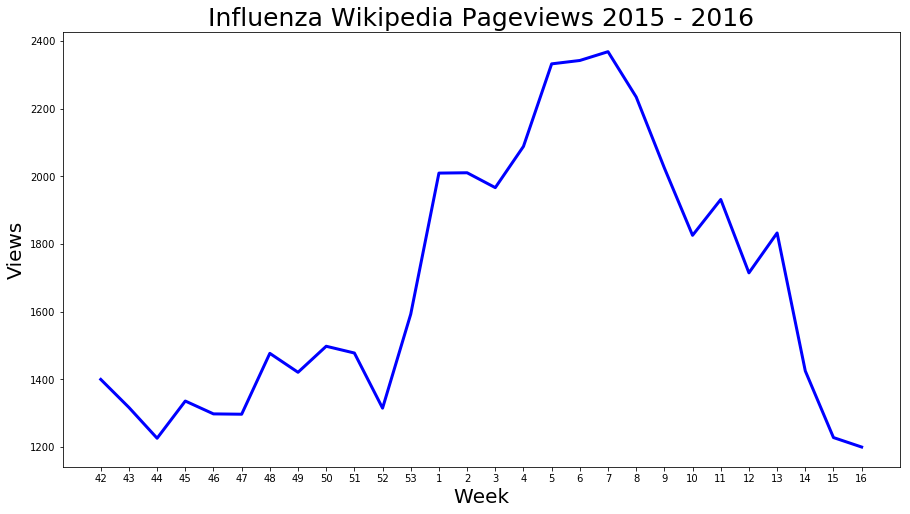

In [51]:
#Plot for 2015 - 2016
plt.figure(figsize=(15,8))
plt.plot(week2015_2016,color='blue',linewidth=3)
plt.xticks(range(len(week2015_2016)), x_1)
plt.xlabel("Week",size= 20)
plt.ylabel("Views",size= 20)
plt.title("Influenza Wikipedia Pageviews 2015 - 2016", size= 25)

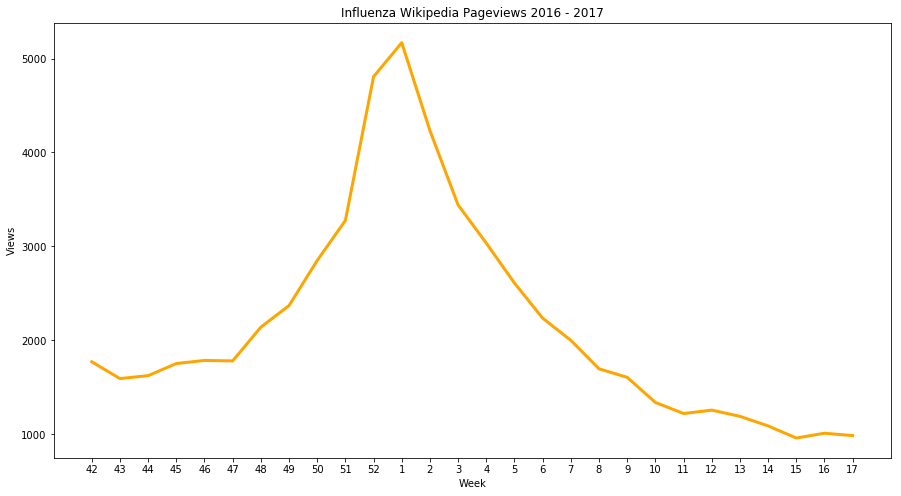

In [52]:
#Plot for 2016 - 2017
plt.figure(figsize=(15,8))
plt.plot(week2016_2017,color='orange',linewidth=3)
plt.xticks(range(len(week2016_2017)), x_2)
plt.xlabel("Week")
plt.ylabel("Views")
plt.title("Influenza Wikipedia Pageviews 2016 - 2017")

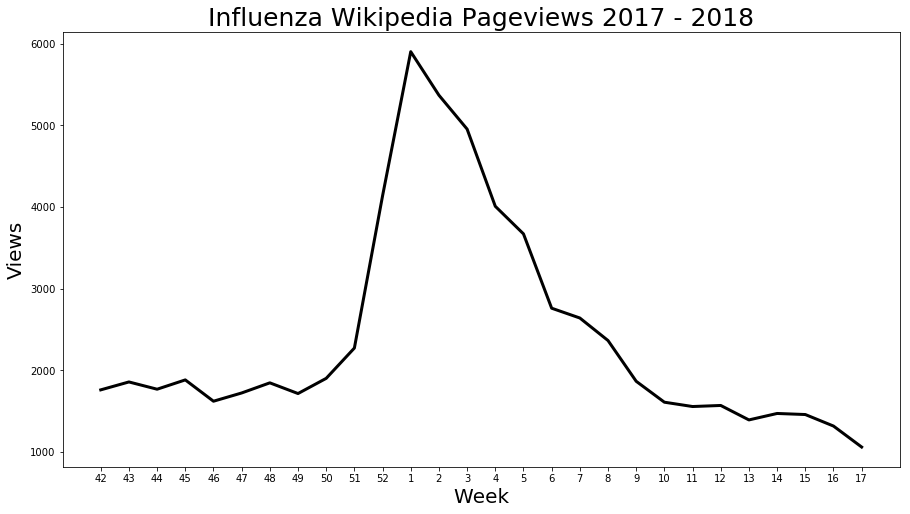

In [53]:
#Plot for 2017 - 2018
plt.figure(figsize=(15,8))
plt.plot(week2017_2018,color='black',linewidth=3)
plt.xticks(range(len(week2017_2018)), x_3)

plt.xlabel("Week", size= 20)
plt.ylabel("Views", size= 20)
plt.title("Influenza Wikipedia Pageviews 2017 - 2018", size= 25)

#### We can see that the graphs of 2016 - 2017 and 2017 - 2018 are very similar.

# 1.2

#### Here we read the official data of the Influnet reports for each period we selected and then extract the column "Incidenza" and we verify that the data is in the correct format by changing the decimal comma to decimal point

In [9]:
dfI2015=pd.read_csv("tabula-InfluNet - Stagione 2015 - 2016.csv")
dfI2016=pd.read_csv("tabula-InfluNet - Stagione 2016 - 2017.csv")
dfI2017=pd.read_csv("tabula-InfluNet - Stagione 2017 - 2018.csv")

In [10]:
weekI2015_2016 = dfI2015['Incidenza'].tolist()
weekI2016_2017 = dfI2016['Incidenza'].tolist()
weekI2017_2018 = dfI2017['Incidenza'].tolist()

In [11]:
weekI2015_2016=[float(i.replace(',', '.')) for i in weekI2015_2016]
weekI2016_2017=[float(i.replace(',', '.')) for i in weekI2016_2017]
weekI2017_2018=[float(i.replace(',', '.')) for i in weekI2017_2018]

#### Now we plot the influnet official data for each period of time

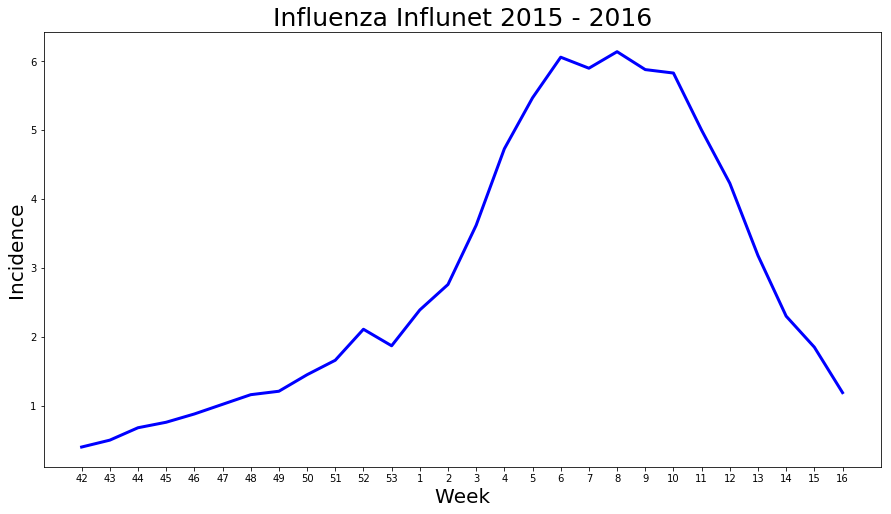

In [62]:
#Plot for 2015 - 2016
plt.figure(figsize=(15,8))
plt.plot(weekI2015_2016,color='blue',linewidth=3)
plt.xticks(range(len(weekI2015_2016)), x_1)
plt.xlabel("Week", size= 20)
plt.ylabel("Incidence", size = 20)
plt.title("Influenza Influnet 2015 - 2016", size = 25)

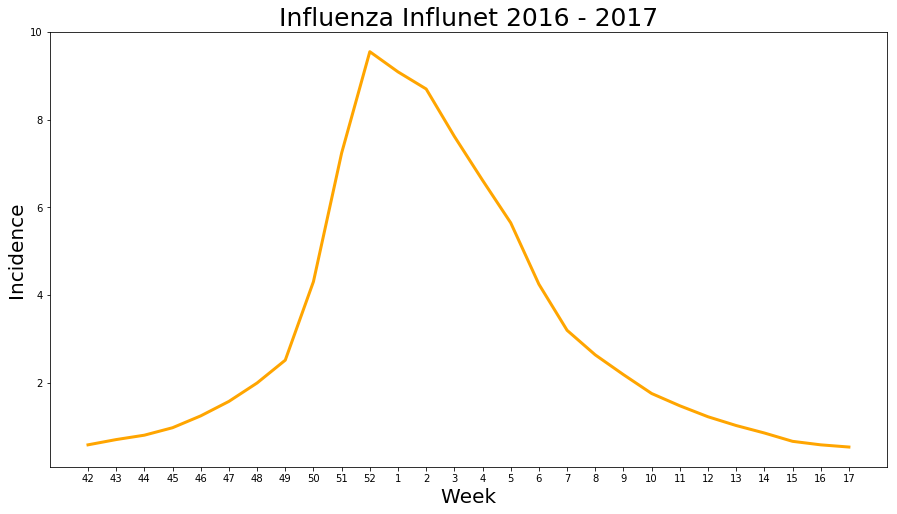

In [63]:
#Plot for 2016 -2017
plt.figure(figsize=(15,8))
plt.plot(weekI2016_2017,color='orange',linewidth=3)
plt.xticks(range(len(weekI2016_2017)), x_2)
plt.xlabel("Week", size = 20)
plt.ylabel("Incidence", size = 20)
plt.title("Influenza Influnet 2016 - 2017", size = 25)

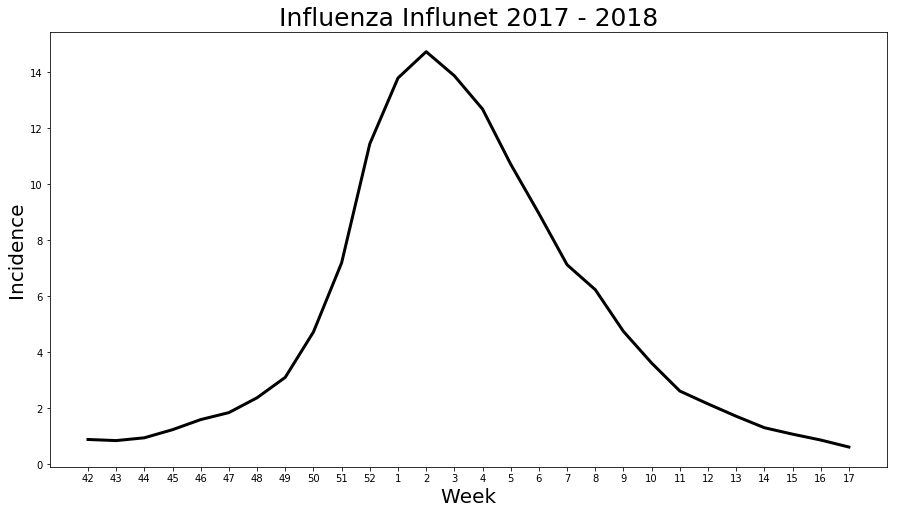

In [64]:
#Plot for 2017 - 2018
plt.figure(figsize=(15,8))
plt.plot(weekI2017_2018,color='black',linewidth=3)
plt.xticks(range(len(weekI2017_2018)), x_3)

plt.xlabel("Week",size = 20)
plt.ylabel("Incidence", size = 20)
plt.title("Influenza Influnet 2017 - 2018", size = 25)

#### Here we find the correlation between the Influnet official data and the wikipedia pageviews for "Influenza"

In [15]:
#Correlation 2015-2016
corr2015_2016=pearsonr(week2015_2016,weekI2015_2016)[0]

#Correlation 2016-2017
corr2016_2017=pearsonr(week2016_2017,weekI2016_2017)[0]

#Correlation 2017-2018
corr2017_2018=pearsonr(week2017_2018,weekI2017_2018)[0]

In [16]:
print(corr2015_2016,corr2016_2017,corr2017_2018)

0.8831045834638593 0.9498488755086596 0.947740411030092


#### The correlation among the two variables are high, specially in the periods 2016-2017 and 2017-2018

# 2.1

#### We extract all the links found in the Influenza wikipedia website using BeautifulSoup library, excluding article's references and websites that aren't a wikipedia article

In [17]:
url = "https://it.wikipedia.org/wiki/Influenza"

content = requests.get(url)
soup = BeautifulSoup(content.text, "lxml")

nums=['1','2','3','4','5','6','7','8','9','0']

features = []
for feature in soup.find_all('a'):
    f = feature.get("href")
    if f!=None and f[:6]=='/wiki/' and ':' not in f and f[6:7] not in nums and f!='/wiki/Influenza':
        features.append(f[6:])
features=list(set(features))

#### We create de function that will get the pageviews for all the links extracted in the previous part using the Wikipedia Pageviews API. We deleted all the links that don't have the pageviews information for every day from the start date until the end date

In [18]:
def get_views(start,final,features):
    new_features_y1_y2=[]
    pbar=ProgressBar()
    count=0
    features_y1_y2={}
    for f in pbar(features):
        f_y1_y2=[]
        try:
            index=0
            for i in pageviewapi.per_article('it.wikipedia', f, start, final, access='all-access', agent='all-agents', granularity='daily')["items"]:
                f_y1_y2.append(i['views'])
            if len(f_y1_y2) ==196:
                new_features_y1_y2.append(f)
                features_y1_y2[f]=f_y1_y2
        except:
            pass
    return features_y1_y2,f_y1_y2,new_features_y1_y2

#### We get the pageviews for all three periods

In [19]:
### 2015 - 2016
start_2015_2016="20151012"
final_2015_2016="20160424"

features_2015_2016,f_2015_2016,new_features_2015_2016=get_views(start_2015_2016,final_2015_2016,features)

### 2016 - 2017
start_2016_2017="20161017"
final_2016_2017="20170430"

features_2016_2017,f_2016_2017,new_features_2016_2017=get_views(start_2016_2017,final_2016_2017,features)

### 2017 - 2018
start_2017_2018="20171016"
final_2017_2018="20180429"

features_2017_2018,f_2017_2018,new_features_2017_2018=get_views(start_2017_2018,final_2017_2018,features)

100% (245 of 245) |######################| Elapsed Time: 0:01:02 Time:  0:01:02
100% (245 of 245) |######################| Elapsed Time: 0:01:02 Time:  0:01:02
100% (245 of 245) |######################| Elapsed Time: 0:01:03 Time:  0:01:03


#### As the pageviews are given in a daily format we performed the following operation in order to get the weekly count for every link

In [20]:
def weekly_pageviews(features_y1_y2,x_):
    weekASy1_y2={}
    #As we have the daily pageviews in the dataframe, here we sum the views for every week
    for k,v in features_y1_y2.items():
        weekFEATy1_y2=[None]*len(x_)
        for i in range(len(x_)):
            suma=0
            for j in range(i*7,(i*7)+7):
                suma=suma+v[j]
            weekFEATy1_y2[i]=suma
        weekASy1_y2[k]=weekFEATy1_y2
    return weekASy1_y2

In [21]:
weekAS2015_2016= weekly_pageviews(features_2015_2016,x_1)
weekAS2016_2017= weekly_pageviews(features_2016_2017,x_2)
weekAS2017_2018= weekly_pageviews(features_2017_2018,x_3)

In [22]:
def get_labels(new_features_y1_y2):
    label=[]
    label.append("Influenza")
    for i in new_features_y1_y2:
        label.append(i)
    return label

In [23]:
label_2015_2016=get_labels(new_features_2015_2016)
label_2016_2017=get_labels(new_features_2016_2017)
label_2017_2018=get_labels(new_features_2017_2018)

In [24]:
def prepare_data(weekASy1_y2,weekIy1_y2,labely1_y2):
    w_ly1_y2=[None]*(len(weekASy1_y2)+1)
    w_ly1_y2[0]=weekIy1_y2
    for i in range(1,(len(weekASy1_y2)+1)):
        w_ly1_y2[i]=weekASy1_y2[labely1_y2[i]]
    return (w_ly1_y2)

In [25]:
wl2015_2016=prepare_data(weekAS2015_2016,weekI2015_2016,label_2015_2016)
wl2016_2017=prepare_data(weekAS2016_2017,weekI2016_2017,label_2016_2017)
wl2017_2018=prepare_data(weekAS2017_2018,weekI2017_2018,label_2017_2018)

#### Here we find the correlation between the features extracted and the influnet official data and select the ones that have correlation higher than 0.85

In [26]:
def correlation_features(weekIy1_y2,weekASy1_y2,labely1_y2,w_ly1_y2):
    corr_y1_y2=[]
    lab=[]
    lab.append('Influenza')
    corr_w_y1_y2=[]
    corr_w_y1_y2.append(weekIy1_y2)
    for i in range(1,(len(weekASy1_y2)+1)):
        corr=pearsonr(weekIy1_y2,w_ly1_y2[i])[0]
        if corr>0.85:
            corr_y1_y2.append(corr)
            lab.append(labely1_y2[i])
            corr_w_y1_y2.append(w_ly1_y2[i])
            print(labely1_y2[i],": ",corr)
    return lab,corr_y1_y2,corr_w_y1_y2

In [27]:
print('######### YEAR 2015 - 2016 #########')
lab_2015_2016,corr_2015_2016,corr_w_2015_2016=correlation_features(weekI2015_2016,weekAS2015_2016,label_2015_2016,wl2015_2016)
print("                                   ")
print('######### YEAR 2016 - 2017 #########')
lab_2016_2017,corr_2016_2017,corr_w_2016_2017=correlation_features(weekI2016_2017,weekAS2016_2017,label_2016_2017,wl2016_2017)
print("                                   ")
print('######### YEAR 2017 - 2018 #########')
lab_2017_2018,corr_2017_2018,corr_w_2017_2018=correlation_features(weekI2017_2018,weekAS2017_2018,label_2017_2018,wl2017_2018)

######### YEAR 2015 - 2016 #########
Febbre :  0.9752370662746356
Antibiotico :  0.9268477230903857
Tracheite :  0.9240737330642186
Polmonite :  0.8615795178870601
Bronchite_acuta :  0.9108640268117839
                                   
######### YEAR 2016 - 2017 #########
Febbre :  0.963078633339234
Antibiotico :  0.8641073237099107
Starnuto :  0.8679220623707175
Bronchite :  0.9534826088678957
Paracetamolo :  0.8710701952653227
Polmonite :  0.9157089352905254
Influenzavirus_A :  0.9159534410131485
Tosse :  0.9274302643570271
Oseltamivir :  0.9450831293188438
Zanamivir :  0.8662851553227228
Pandemia_influenzale :  0.8831636013063174
                                   
######### YEAR 2017 - 2018 #########
Febbre :  0.8749561676323208
Influenza_di_Hong_Kong :  0.8966087718847883
Antibiotico :  0.8693549861618123
Polmonite :  0.8630907353598585
Influenzavirus_A :  0.9022263381067069
Bronchite_acuta :  0.8797634557413763
Oseltamivir :  0.9287959850666783
Sindrome_di_Reye :  0.85489039246

#### We find that for 2015 - 2016 the wikipedia websites "Febbre", "Antibiotico", "Tracheite" and "Bronchite_acuta" have a higher correlation with the Influnet official data than the wikipedia website for "Influenza"

#### For 2016 - 2017 the wikipedia articles "Febbre" and "Bronchite" had a higher correlation with the Influnet official data than the wikipedia website for "Influenza"

#### For 2017 - 2018 the "Influenza" wikipedia article had a higher correlation with the Influnet signal than any other article


In [28]:
#Normalize data
norm_2015_2016 = [[i / sum(j) for i in j] for j in corr_w_2015_2016]
norm_2016_2017 = [[i / sum(j) for i in j] for j in corr_w_2016_2017]
norm_2017_2018 = [[i / sum(j) for i in j] for j in corr_w_2017_2018]

#### We plot the Influnet influenza signal with the selected features

In [29]:
def graph(norm_y1_y2,lab_y1_y2):
    n_colors=["red","blue","green","black","pink","gold","purple","brown","grey","cyan","orchid","tan","pink","olive","erin","orange"]
    i=0
    plt.figure(figsize=(15,8))
    colors=n_colors[:len(norm_y1_y2)]
    for y in norm_y1_y2:
        x=range(1, len(y)+1)
        plt.plot(x,y,label=lab_y1_y2[i],color=colors[i])
        i=i+1
    plt.legend()
    plt.show()
    return

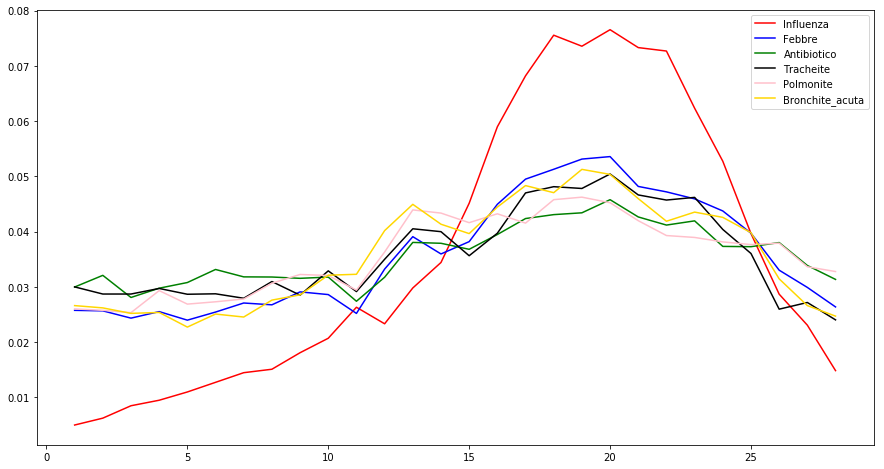

In [30]:
graph(norm_2015_2016,lab_2015_2016)

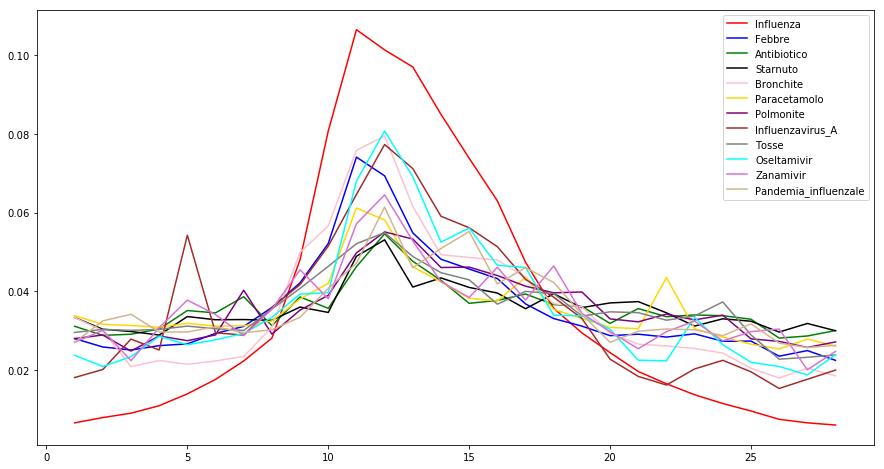

In [31]:
graph(norm_2016_2017,lab_2016_2017)

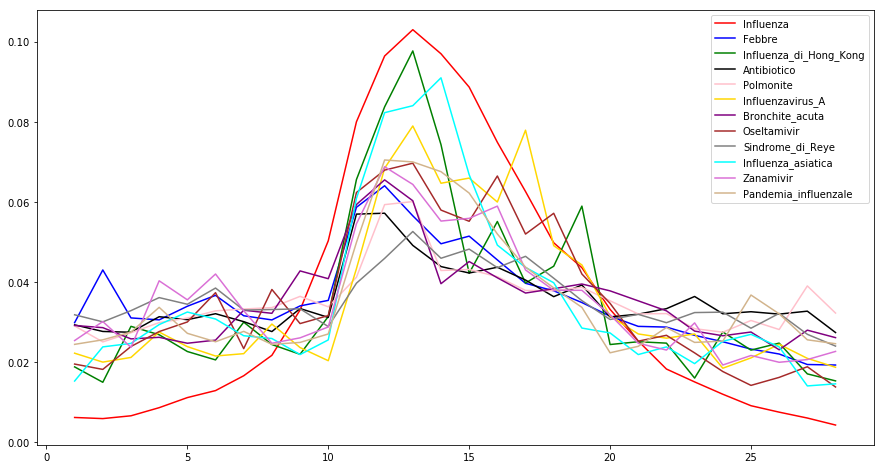

In [32]:
graph(norm_2017_2018,lab_2017_2018)

# 3.1

#### The features for our selected model are:
- The number of the weeks
- The 'Influenza' wikipedia pageviews
- The extracted features that have correlation higher than 0.85 with the Influnet data

In [33]:
###Select features

#Weeks
#Wikipedia pageviews counts for "Influenza" page and all the pages selected in part 2
def create_dataset(corr_w_y1_y2,x_,lab_y1_y2,weeky1_y2,weekIy1_y2):
    set_feat=[None]*(len(corr_w_y1_y2)+1)
    set_feat[0]='Week'
    set_feat[1]='Influenza Pageviews'
    Features=[None]*(len(corr_w_y1_y2)+1)
    Features[0]=x_
    Features[1]=weeky1_y2

    for i in range(2,(len(corr_w_y1_y2)+1)):
        Features[i]=corr_w_y1_y2[i-1]
        set_feat[i]=lab_y1_y2[i-1]
    y=np.array(weekIy1_y2)
    x_=list(map(list, zip(*Features)))
    x = pd.DataFrame(x_,columns=set_feat)
    return x,y


In [34]:
x_2015_2016,y_2015_2016=create_dataset(corr_w_2015_2016,x_1,lab_2015_2016,week2015_2016,weekI2015_2016)
x_2016_2017,y_2016_2017=create_dataset(corr_w_2016_2017,x_2,lab_2016_2017,week2016_2017,weekI2016_2017)
x_2017_2018,y_2017_2018=create_dataset(corr_w_2017_2018,x_3,lab_2017_2018,week2017_2018,weekI2017_2018)

#### Split the dataset into train and test datasets with a test size equal to 20%

In [35]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_2015_2016,y_2015_2016, test_size=0.2, random_state=42)
print("################## YEAR 2015 - 2016 ################")
print( x_train_1.shape, y_train_1.shape)
print (x_test_1.shape, y_test_1.shape)
print(" ")

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2016_2017,y_2016_2017, test_size=0.2, random_state=42)
print("################## YEAR 2016 - 2017 ################")
print( x_train_2.shape, y_train_2.shape)
print (x_test_2.shape, y_test_2.shape)
print(" ")

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_2017_2018,y_2017_2018, test_size=0.2, random_state=42)
print("################## YEAR 2017 - 2018 ################")
print( x_train_3.shape, y_train_3.shape)
print (x_test_3.shape, y_test_3.shape)
print(" ")

################## YEAR 2015 - 2016 ################
(22, 7) (22,)
(6, 7) (6,)
 
################## YEAR 2016 - 2017 ################
(22, 13) (22,)
(6, 13) (6,)
 
################## YEAR 2017 - 2018 ################
(22, 13) (22,)
(6, 13) (6,)
 


#### For each period we performed three models:

- Lasso
- Random Forest
- Ridge

#### For each model we did gridsearch in order to find the best parameters to fit the model

In [36]:
def Lasso_Model(x_train,y_train,x_test,y_test):
    
    clf=Lasso()
    param_grid = {
        'alpha': [0.01,0.05,0.1,0.5]
             }
    grid_clf = GridSearchCV(clf, param_grid, cv=10)
    grid_clf.fit(x_train, y_train)
    print("The best parameters for Lasso are: ",grid_clf.best_params_)
    new_model=Lasso(alpha=grid_clf.best_params_['alpha'])
    new_model.fit(x_train,y_train)
    test_pred = np.array(new_model.predict(x_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    r2=r2_score(y_test,test_pred)
    
    print("R2: ",r2, " - RMSE: ", RMSE)
    return test_pred

In [37]:
print("################## YEAR 2015 - 2016 ################")
L_pred_2015_2016=Lasso_Model(x_train_1,y_train_1,x_test_1,y_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
L_pred_2016_2017=Lasso_Model(x_train_2,y_train_2,x_test_2,y_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
L_pred_2017_2018=Lasso_Model(x_train_3,y_train_3,x_test_3,y_test_3)
print(" ")

################## YEAR 2015 - 2016 ################
The best parameters for Lasso are:  {'alpha': 0.5}
R2:  0.8639340085055083  - RMSE:  1.5299169054949255
 
################## YEAR 2016 - 2017 ################
The best parameters for Lasso are:  {'alpha': 0.5}
R2:  0.7930253723048483  - RMSE:  3.5701150956209773
 
################## YEAR 2017 - 2018 ################
The best parameters for Lasso are:  {'alpha': 0.5}
R2:  0.852471442189905  - RMSE:  4.502904390629461
 


#### For the Lasso model we got a better performance in the first period (2015 - 2016) with alpha=0.5

In [38]:
def RandomForest(x_train,y_train,x_test,y_test):
    clf=RandomForestRegressor()
    cross_validated= np.mean(cross_val_score(clf, x_train, y_train, cv=10))   
    param_grid = {
                 'n_estimators': [10,20,50,100,200,500],
                 'max_depth': [2, 5, 7, 9]
             }
    grid_clf = GridSearchCV(clf, param_grid, cv=10)
    grid_clf.fit(x_train, y_train)
    print("The best parameters for Random Forest are: ",grid_clf.best_params_)
    new_model=RandomForestRegressor(n_estimators=grid_clf.best_params_['n_estimators'],max_depth=grid_clf.best_params_['max_depth'])
    new_model.fit(x_train,y_train)
    test_pred = np.array(new_model.predict(x_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    r2=r2_score(y_test,test_pred)
    print("R2: ",r2, " - RMSE: ", RMSE)
    return test_pred

In [39]:
print("################## YEAR 2015 - 2016 ################")
RF_pred_2015_2016=RandomForest(x_train_1,y_train_1,x_test_1,y_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
RF_pred_2016_2017=RandomForest(x_train_2,y_train_2,x_test_2,y_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
RF_pred_2017_2018=RandomForest(x_train_3,y_train_3,x_test_3,y_test_3)
print(" ")

################## YEAR 2015 - 2016 ################
The best parameters for Random Forest are:  {'max_depth': 2, 'n_estimators': 50}
R2:  0.6761601746587056  - RMSE:  2.3602509252488657
 
################## YEAR 2016 - 2017 ################
The best parameters for Random Forest are:  {'max_depth': 2, 'n_estimators': 20}
R2:  0.8865104808342648  - RMSE:  2.6436352882357035
 
################## YEAR 2017 - 2018 ################
The best parameters for Random Forest are:  {'max_depth': 9, 'n_estimators': 10}
R2:  0.8026894006641501  - RMSE:  5.207507273158628
 


#### For the Random Forest model we got a better performance in the second period (2016 - 2017) with max_depth=2 and n_estimators=20

In [72]:
def Ridge_Model(x_train,y_train,x_test,y_test):
    clf=Ridge()
    param_grid = {
                 'alpha': [0.01,0.05,0.1,0.5]
             }
    grid_clf = GridSearchCV(clf, param_grid, cv=10)
    grid_clf.fit(x_train, y_train)
    print("The best parameters for Ridge are: ",grid_clf.best_params_)
    new_model=Ridge(alpha=grid_clf.best_params_['alpha'])
    new_model.fit(x_train,y_train)
    test_pred = np.array(new_model.predict(x_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    r2=r2_score(y_test,test_pred)
    print("R2: ",r2, " - RMSE: ", RMSE)
    
    return test_pred

In [41]:
print("################## YEAR 2015 - 2016 ################")
R_pred_2015_2016=Ridge_Model(x_train_1,y_train_1,x_test_1,y_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
R_pred_2016_2017=Ridge_Model(x_train_2,y_train_2,x_test_2,y_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
R_pred_2017_2018=Ridge_Model(x_train_3,y_train_3,x_test_3,y_test_3)

################## YEAR 2015 - 2016 ################
The best parameters for Ridge are:  {'alpha': 0.5}
R2:  0.8521565766647816  - RMSE:  1.5947552969601237
 
################## YEAR 2016 - 2017 ################
The best parameters for Ridge are:  {'alpha': 0.5}
R2:  0.7800066486202846  - RMSE:  3.6806832115917736
 
################## YEAR 2017 - 2018 ################
The best parameters for Ridge are:  {'alpha': 0.5}
R2:  0.8434065783224135  - RMSE:  4.639182251567778


#### For the Ridge model we got a better performance in the first period (2015 - 2016) with alpha=0.5

#### Overall, the best performance was achieved with Random Forest for the second period (2016 - 2017) with max_depth=2 and n_estimators=20, with R2 = 0.8865

# 3.2

#### In this part we add new features to our model:

- The Influnet incidence for the week preceding the target week
- The pageview counts for all the selected pages for the week preceding the target week

#### Then we perform the same three models we did in part 3.1

In [42]:
#Weeks
#Wikipedia pageviews counts for "Influenza" page and all the pages selected in part 2
def create_dataset_new(corr_w_y1_y2,x_,lab_y1_y2,weeky1_y2,weekIy1_y2):
    set_feat=[None]*(len(corr_w_y1_y2)+1)
    set_feat[0]='Week'
    set_feat[1]='Influenza Pageviews' 
    Features=[None]*(len(corr_w_y1_y2)+1)
    Features[0]=x_[1:]
    Features[1]=weeky1_y2[1:]
    for i in range(2,(len(corr_w_y1_y2)+1)):
        Features[i]=corr_w_y1_y2[i-1][1:]
        set_feat[i]=lab_y1_y2[i-1]
    PWlab_y1_y2=[]
    PWlab_y1_y2.append('Influenza Pageviews PW') 
    for i in lab_y1_y2:
        PWlab_y1_y2.append(i+' PW')
    FeaturesPW=[None]*(len(lab_y1_y2)+1)
    FeaturesPW[0]=weeky1_y2[:-1]

    for i in range(1,(len(lab_y1_y2)+1)):
        FeaturesPW[i]=corr_w_y1_y2[i-1][:-1]
    set_feat.extend(PWlab_y1_y2)
    for i in FeaturesPW:
        Features.append(i)
    y2=np.array(weekIy1_y2[:-1])
    x_2=list(map(list, zip(*Features)))
    x2 = pd.DataFrame(x_2,columns=set_feat)
    return x2,y2

In [43]:
x2_2015_2016,y2_2015_2016=create_dataset_new(corr_w_2015_2016,x_1,lab_2015_2016,week2015_2016,weekI2015_2016)
x2_2016_2017,y2_2016_2017=create_dataset_new(corr_w_2016_2017,x_2,lab_2016_2017,week2016_2017,weekI2016_2017)
x2_2017_2018,y2_2017_2018=create_dataset_new(corr_w_2017_2018,x_3,lab_2017_2018,week2017_2018,weekI2017_2018)

In [47]:
x2_train_1, x2_test_1, y2_train_1, y2_test_1 = train_test_split(x2_2015_2016,y2_2015_2016, test_size=0.2, random_state=42)
print("################## YEAR 2015 - 2016 ################")
print( x2_train_1.shape, y2_train_1.shape)
print (x2_test_1.shape, y2_test_1.shape)
print(" ")

x2_train_2, x2_test_2, y2_train_2, y2_test_2 = train_test_split(x2_2016_2017,y2_2016_2017, test_size=0.2, random_state=42)
print("################## YEAR 2016 - 2017 ################")
print( x2_train_2.shape, y2_train_2.shape)
print (x2_test_2.shape, y2_test_2.shape)
print(" ")

x2_train_3, x2_test_3, y2_train_3, y2_test_3 = train_test_split(x2_2017_2018,y2_2017_2018, test_size=0.2, random_state=42)
print("################## YEAR 2017 - 2018 ################")
print( x2_train_3.shape, y2_train_3.shape)
print (x2_test_3.shape, y2_test_3.shape)
print(" ")

################## YEAR 2015 - 2016 ################
(21, 14) (21,)
(6, 14) (6,)
 
################## YEAR 2016 - 2017 ################
(21, 26) (21,)
(6, 26) (6,)
 
################## YEAR 2017 - 2018 ################
(21, 26) (21,)
(6, 26) (6,)
 


In [48]:
print("################## YEAR 2015 - 2016 ################")
L2_pred_2015_2016=Lasso_Model(x2_train_1,y2_train_1,x2_test_1,y2_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
L2_pred_2016_2017=Lasso_Model(x2_train_2,y2_train_2,x2_test_2,y2_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
L2_pred_2017_2018=Lasso_Model(x2_train_3,y2_train_3,x2_test_3,y2_test_3)
print(" ")

################## YEAR 2015 - 2016 ################
The best parameters for Lasso are:  {'alpha': 0.5}
R2:  0.8546542094884857  - RMSE:  1.5991601414127037
 
################## YEAR 2016 - 2017 ################
The best parameters for Lasso are:  {'alpha': 0.01}
R2:  0.775563646763345  - RMSE:  3.6972481618395587
 
################## YEAR 2017 - 2018 ################
The best parameters for Lasso are:  {'alpha': 0.01}
R2:  0.8932125869720148  - RMSE:  4.069401626611871
 


#### For the Lasso model we obtained a better performance than in part 3.1 just in the last period (2017 - 2018) 

In [49]:
print("################## YEAR 2015 - 2016 ################")
RF2_pred_2015_2016=RandomForest(x2_train_1,y2_train_1,x2_test_1,y2_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
RF2_pred_2016_2017=RandomForest(x2_train_2,y2_train_2,x2_test_2,y2_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
RF2_pred_2017_2018=RandomForest(x2_train_3,y2_train_3,x2_test_3,y2_test_3)
print(" ")

################## YEAR 2015 - 2016 ################
The best parameters for Random Forest are:  {'max_depth': 7, 'n_estimators': 500}
R2:  0.8547706200111594  - RMSE:  1.5985196125165264
 
################## YEAR 2016 - 2017 ################
The best parameters for Random Forest are:  {'max_depth': 7, 'n_estimators': 20}
R2:  0.931395465676516  - RMSE:  2.044129521336649
 
################## YEAR 2017 - 2018 ################
The best parameters for Random Forest are:  {'max_depth': 5, 'n_estimators': 10}
R2:  0.8711575134096635  - RMSE:  4.4699232935252935
 


#### For the Random Forest model we obtained a better performance than in part 3.1 in every period

In [50]:
print("################## YEAR 2015 - 2016 ################")
R2_pred_2015_2016=Ridge_Model(x2_train_1,y2_train_1,x2_test_1,y2_test_1)
print(" ")

print("################## YEAR 2016 - 2017 ################")
R2_pred_2016_2017=Ridge_Model(x2_train_2,y2_train_2,x2_test_2,y2_test_2)
print(" ")

print("################## YEAR 2017 - 2018 ################")
R2_pred_2017_2018=Ridge_Model(x2_train_3,y2_train_3,x2_test_3,y2_test_3)

################## YEAR 2015 - 2016 ################
The best parameters for Ridge are:  {'alpha': 0.01}
R2:  0.9999463478307326  - RMSE:  0.030724467910897547
 
################## YEAR 2016 - 2017 ################
The best parameters for Ridge are:  {'alpha': 0.01}
R2:  0.6372612476859643  - RMSE:  4.700336791630194
 
################## YEAR 2017 - 2018 ################
The best parameters for Ridge are:  {'alpha': 0.5}
R2:  0.868672841581664  - RMSE:  4.512817752928638


#### For the Ridge model we obtained a better performance than in part 3.1 in the first (2015 - 2016) and third (2017 - 2018) periods

#### Overall, the best performance was achieved with Ridge for the first period (2015 - 2016) with alpha=0.01, with R2 = 0.9999


In [77]:
print("Correlation using the best model for prediction: ",pearsonr(R2_pred_2015_2016,y2_test_1)[0])

Correlation using the best model for prediction:  0.9999738489939309


#### The authors obtained a correlation coefficient of 0.9854 while we obtained a slightly better result of 0.9999

# CONCLUSIONS

1. Looking at the first part of the homework we realized that the "Influenza" wikipedia pageviews increments every year, as well as the Influnet incidence. It means that every year more flu cases are being reported, from this we can derive that either more people are getting the flu each year or that people are starting to care more about their health and going to the doctor more frequently.

2. In general, the wikipedia pageviews for flu symptoms as "Febbre", "Bronchite" and "Polmonite" and flu treatments like "Paracetamolo" and "Antibiotico" are highly correlated with the Influnet incidence.

3. We can conclude that using the wikipedia pageviews of "Influenza" and highly correlated articles is a good method for predicting the flu incidence in the population, but adding the precedent data to the target week gives a better result.

4. This approach can be useful in countries with flu seasons similar to Italy, but in countries with different flu seasons such as Colombia where the weather is invariate, the approach might not give a good prediction.